# Exploration des mots

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

## 

In [46]:
words_meta_filename = "../data/ascii/words.txt"
BASE_IMG_PATH = '../data/words'

def get_first_dataset_line_index(filename):
    with open(filename,'r') as f:
        i = 1
        for line in f:
            if not line.startswith("#"): 
                return i
            i += 1
        return -1

def show_img(path):
    img = plt.imread(path)
    plt.figure(figsize = (20,10))
    plt.imshow(img)

def get_word_image_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    return BASE_IMG_PATH + '/' + path_parts[0] + '/' + "-".join(path_parts[0:2]) + '/' + word_id+ '.png'

def show_df_image_by_word_id(word_id):
    full_path = get_word_image_path_by_word_id(word_id)
    show_img(full_path)


def get_form_img_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    first_letter = path_parts[0][0].lower()
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + "-".join(path_parts[0:2]) + '.png'

def show_form_img_by_word_id(word_id):
    show_img(get_form_img_path_by_word_id(word_id))
    

In [ ]:
first_line_index = get_first_dataset_line_index(words_meta_filename)
print(first_line_index)

In [51]:
columns= ['word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag', 'transcription']

df = pd.read_csv(words_meta_filename, names=columns, delimiter=" ", header=first_line_index-2, on_bad_lines='skip')
df.head(100)


,word_id,seg_res,gray_level,x,y,w,h,tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
...,...,...,...,...,...,...,...,...,...
95,a01-000x-04-10,ok,173,2037,1532,7,26,",",","
96,a01-000x-05-01,ok,173,679,1637,65,131,IN,for
97,a01-000x-05-02,ok,173,868,1635,255,88,NP,Manchester
98,a01-000x-05-03,ok,173,1212,1644,239,146,NP,Exchange


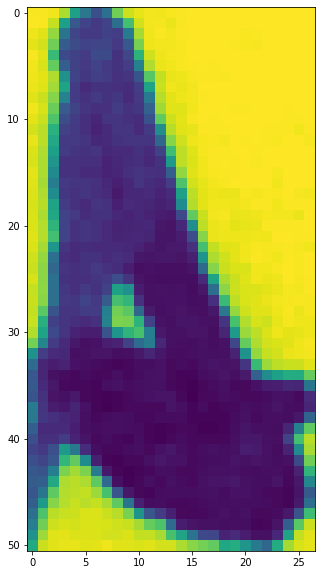

In [33]:
show_df_image_by_word_id(df.iloc[0].word_id)

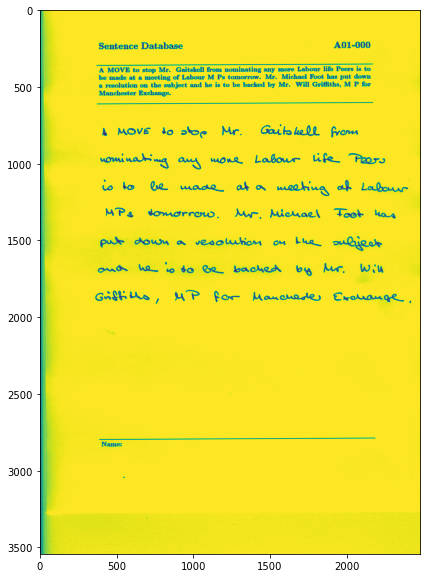

In [34]:
show_form_img_by_word_id(df.iloc[0].word_id)

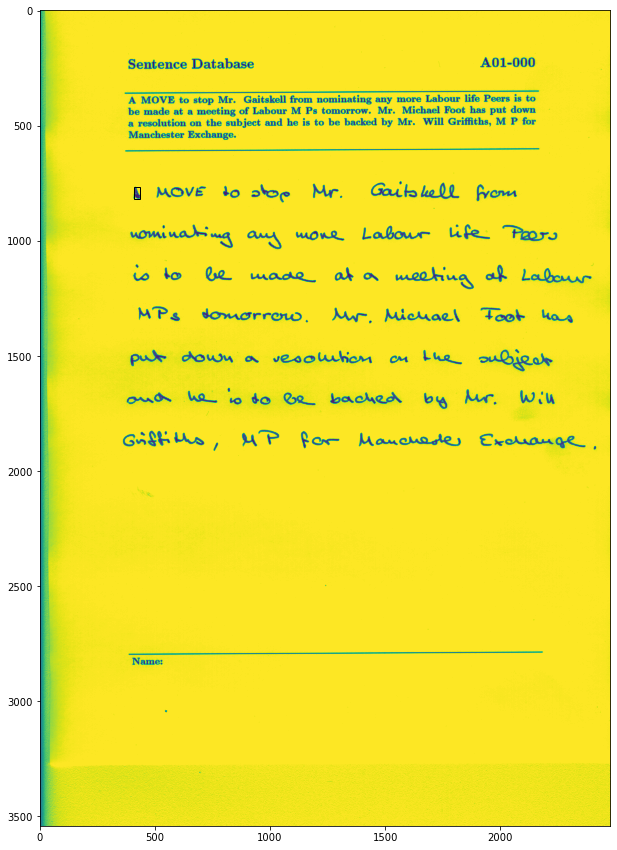

In [45]:
def plot_bounding_box(line):
    
    form_img_path = get_form_img_path_by_word_id(line.word_id)
    img = plt.imread(form_img_path)

    fig, ax = plt.subplots(figsize=(20,15))
    fig.figsize=(20,10)
    ax.imshow(img)
    ax.add_patch(
        patches.Rectangle(
            (line.x, line.y),
            line.w,
            line.h,
            fill=False      
        ) ) 
    plt.show()

plot_bounding_box(df.iloc[0])

# TODO

- Count occurences of each letters, make sure that the dataset is balanced
- Make an img representation of the avg positioning of text using a mask
    - Make sure that all imgs have the same height and width
    - Calculate the coordinates in the standardized img
    - Show mask colorated img

- check influence of grayscale over the results ? 
- check influence of rotation on segmentation


# Répartition des lettres dans le corpus

In [58]:

corpus = "".join([trans.lower() for trans in df['transcription']])

def get_letter_frequency_dict(text):
    dic = {}
    for l in text:
        if l in dic:
            dic[l] += 1
        else:
            dic[l] = 1
    return dic

freq_dict = get_letter_frequency_dict(corpus)
print(freq_dict)


{'a': 48321, 'm': 17369, 'o': 67756, 'v': 9147, 'e': 67512, 't': 46507, 's': 31362, 'p': 20625, 'r': 48168, '.': 8315, 'g': 9878, 'i': 38021, 'k': 39780, 'l': 22841, 'f': 11010, 'n': 56009, 'y': 8491, 'b': 16301, 'u': 13524, 'd': 24680, 'w': 10144, 'c': 20973, 'h': 28273, 'j': 8285, ',': 7486, 'x': 1659, '-': 121319, "'": 3208, '\n': 39716, '0': 207999, '1': 188259, '3': 72212, '9': 57534, '5': 63113, ' ': 317733, '6': 74387, '4': 70733, '2': 85990, '8': 67580, '7': 73578, '*': 2031, '#': 79, 'q': 580, '(': 259, ')': 256, ':': 218, 'z': 1396, '$': 898, '&': 179, ';': 255, '?': 411, '!': 295, '/': 16, '"': 21, '+': 9}


In [77]:
keys = list(freq_dict.keys())
values = list(freq_dict.values())
sorted_indexes = np.argsort(keys)
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

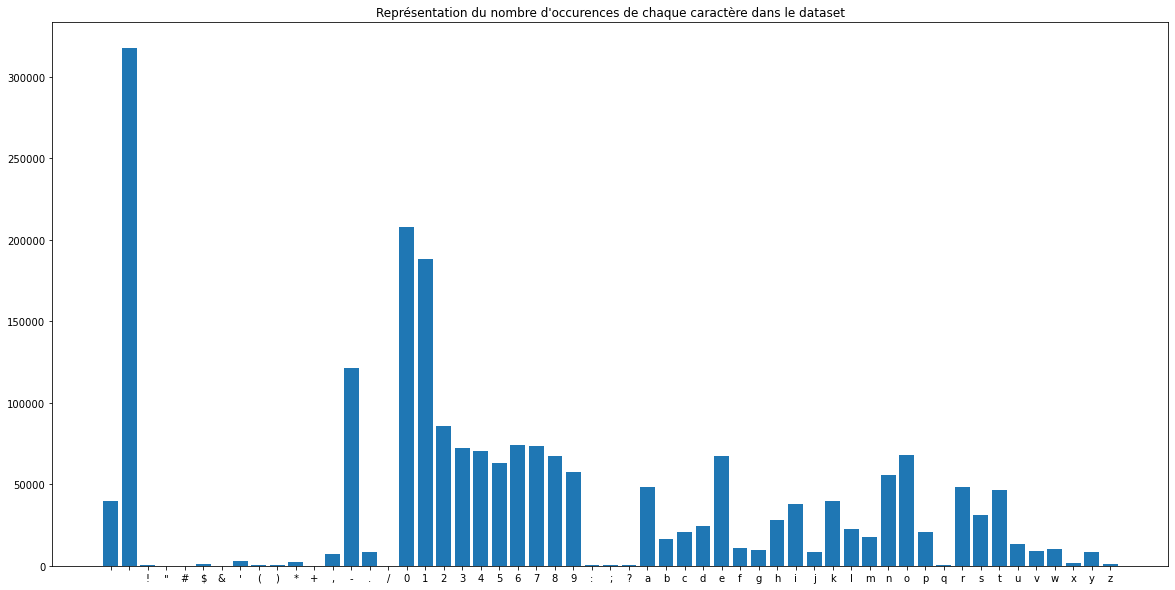

In [79]:
plt.figure(figsize=(20,10))
plt.title("Représentation du nombre d'occurences de chaque caractère dans le dataset")
plt.bar(labels, counts)
plt.show()